In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

**Вспомогательные функции**

In [77]:
def corr_matrix(data: pd.DataFrame, figsize: tuple = (17,5)):
    '''
    Функция для вывода матрицы корреляций с заданным figsize.
    '''
    correlation_matrix = data.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, linewidths=0.2)

def correlation_columns(numerical_data: pd.DataFrame, col1: str, col2: str) -> float:
    '''
    Функция для проверки линейной взаимосвязи между двумя переменными
    '''
    if col1 not in numerical_data.columns or col2 not in numerical_data:
        raise Exception(f'Either col1 or col2 is not in the dataframe that you passed')
    return numerical_data.corr()[col1][col2]

def get_numeric_data_types(dataset: pd.DataFrame) -> pd.DataFrame:
    return dataset.select_dtypes(exclude=['object', 'bool'])

def top_10_correlated_with_price_features(segmented_data: pd.DataFrame) -> pd.Series:
    return get_numeric_data_types(segmented_data).corr()['last_price'].sort_values(ascending=False)[1:11]

**Начнем изучать датасет**

In [3]:
data = pd.read_csv('data.csv', sep='\t')

In [4]:
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4952,19,4600000.0,52.0,2018-09-19T00:00:00,3,2.5,9.0,35.00,1,NaN,...,7.00,NaN,Санкт-Петербург,25331.0,14207.0,0.0,NaN,0.0,NaN,60.0
347,9,4400000.0,72.0,2018-08-31T00:00:00,2,2.7,10.0,42.00,3,NaN,...,12.00,NaN,деревня Кальтино,NaN,NaN,NaN,NaN,NaN,NaN,98.0
22689,2,3253000.0,40.3,2018-08-09T00:00:00,1,NaN,25.0,14.91,6,NaN,...,12.96,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
numerical_data = data.select_dtypes(exclude=['object', 'bool'])

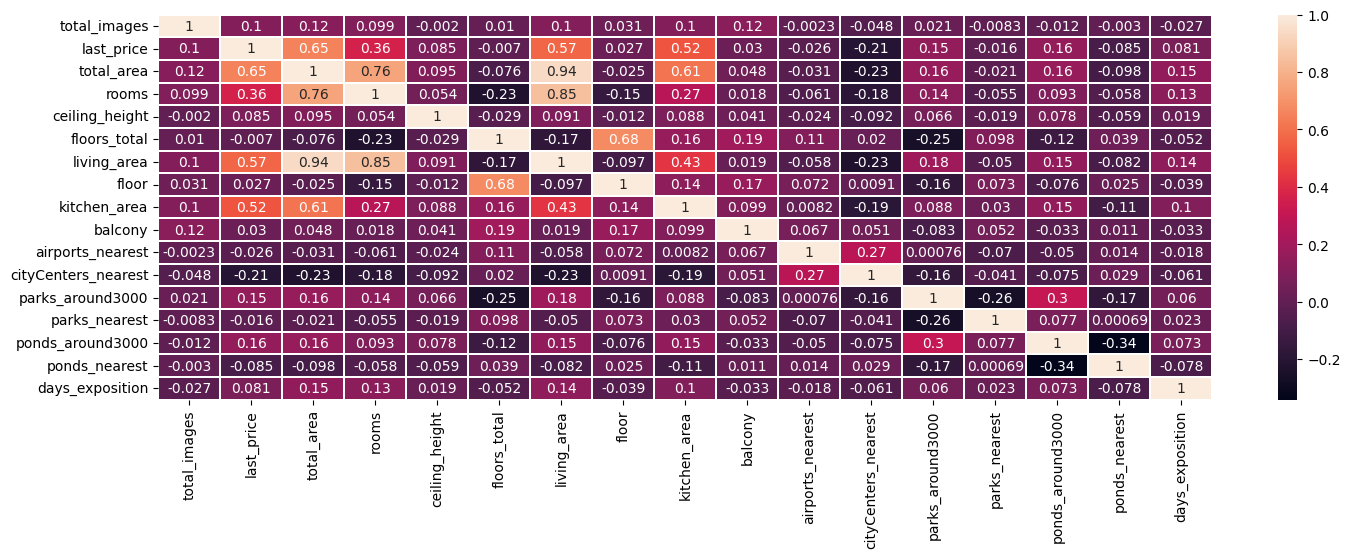

In [7]:
corr_matrix(numerical_data)

**Мы можем заметить, что цена на момент снятия публикации сильнее всего коррелирует с**
- площадью квартиры (м2)
- количеством комнат
- жилой площадью (м2)
- площадью кухни (м2)

А также отрицательно коррелирует с расстоянием до центра города

**Менее значительную корреляцию имеют**
- число парков в радиусе 3 км
- число водоёмов в радиусе 3 км
- количество балконов

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Исследуем колонки с пропущенными значениями**

In [9]:
null_values = data.isnull().sum().sort_values(ascending=False)

**Возможные причины возникновения пропусков**
- is_apartment - возможно, люди просто не знают, как понять, что их квартира является апартаментами 

- parks_nearest - разные причины: некоторые люди при отсутствии парков не будут заполнять информацию о них, кто-то не 
считает это важным, кто-то не знает точное число

- ponds_nearest - та же самая причина что и parks_nearest

- balcony - большинство людей ассоциирует квартиру с одним балконом

- ceiling height - при каких-то "стандартных" значениях никто не придает роли этому признаку. а вот если высота потолка 
большая, то это уже может быть одной из причин более высокой стоимости квартиры

- airports_nearest - мало покупателей интересуется такой информацией

- cityCenters_nearest - скорее всего, риелтор просто не знает расстояние, либо же оно не особо "хорошее", чтобы его ставить в объявление

- ponds_around3000 - то же самое, что и ponds_nearest

- parks_around3000 - то же самое, что и parks_nearest

- days_exposition - тут можно по-разному думать: если у риелтора есть возможность показывать, сколько дней висит объявление, то конечно его выгоднее отключить, особенно если квартира скромная - клиент может подумать, что, если никто не рассматривает ее, то что-то не так - отталкивающий фактор. другая причина - какие-то проблемы парсинга этих данных

- kitchen_area - возможно, кто-то не знает, сколько м2 кухня в квартире, возможно квартира сама по себе маленекая, чтобы это выставлять на показ - можно спугнуть клиента

- living area - склоняюсь к тому, что с большим шансом пропуски обусловены тем, что квартира сама по себе скромная/маленькая. в более редких случаях - риелтор не знает

- floors_total - разные ситуации: кто-то не считает это важным, кто-то думает, что квартира располагается на "обычном" этаже - ну к примеру 3-5 этаж. возможно, квартира находится в 3-х этажном или 2-х этажном здании, поэтому риелтор решил не указывать

- locality_name - возможно, это MCAR (Missing Completely at Random), потому что не знать название населенного пункта - очень редкая ситуация; риелтор мог быть невнимательным


**Заполнение пропущенных значений**

In [10]:
null_values[null_values > 0].index

Index(['is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony',
       'ceiling_height', 'airports_nearest', 'cityCenters_nearest',
       'ponds_around3000', 'parks_around3000', 'days_exposition',
       'kitchen_area', 'living_area', 'floors_total', 'locality_name'],
      dtype='object')

In [11]:
def change_is_apartment_values(value: str) -> str:
    if value == 'False':
        return 'No'
    if value == 'True':
        return 'Yes'
    return value

# Заполним пропуски модой
data['is_apartment'] = data['is_apartment'].fillna(data['is_apartment'].mode()[0])
data['is_apartment'] = data['is_apartment'].apply(change_is_apartment_values)

C:\Users\abein\AppData\Local\Temp\ipykernel_14552\3274683684.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(data['is_apartment'].mode()[0])


In [12]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [13]:
# Предполагая, что люди будут указывать кол-во балконов, когда их > 1, заполним пропуски единицей 
data['balcony'] = data['balcony'].fillna(1)

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean())

In [15]:
data['locality_name'] = data['locality_name'].fillna('Not specified')

In [16]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [17]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

Так как у нас есть явная корреляция между living_area, kitchen_area, мы можем попробовать линейную интерполяцию, чтобы предсказать пропущеные значения 

In [18]:
data['living_area'] = data['living_area'].interpolate(method='linear')
data['kitchen_area'] = data['kitchen_area'].interpolate(method='linear')

Обработка пропущенных значений сделана правильно

In [19]:
data.isnull().sum().sum()

0

**Поменяем типы данных у столбцов**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [21]:
columns = ['days_exposition', 'airports_nearest', 'parks_nearest', 'parks_around3000', 'ponds_around3000',
            'airports_nearest', 'days_exposition', 'balcony', 'rooms', 'total_images',
            'cityCenters_nearest', 'floors_total', 'floor']

# Изменяем тип данных по принципу: в столбцах должно быть целое значение, а не с плавающей точкой. 
for col in columns:
    data[col] = data[col].astype(np.int64)

# Чтобы работать как с датой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Начнем добавлять новые столбцы**

In [23]:
# Стоимость квадратного метра
data['cost_per_squared_meter'] = data['last_price'] / data['total_area']

# День недели, месяц и год публикации объявления
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [24]:
# Тип этажа: первый, последний, другой
conditions = [
    data['floor'] == data['floors_total'],
    data['floor'] == 1,
]
data['floor_type'] = np.select(conditions, ['последний', 'первый'], default='другой')

In [25]:
# Соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_total_area_ration'] = data['kitchen_area'] / data['total_area']

In [26]:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,floor_type,living_area_total_area_ratio,kitchen_area_total_area_ration
17656,13,3900000.0,47.0,2017-12-03,2,2.6,9,30.0,3,False,...,0,502.0,51,82978.723404,6,12,2017,другой,0.638298,0.153191


**Задание 2**

In [98]:
top_10_correlated_with_price_features(data)

cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64

Как мы видим, самые важные характеристики: 
- total_area (площадь квартиры в квадратных метрах (м²))
- cost_per_squared_meter (цена за м²)
- living_area (жилая площадь)
- kitchen_area (площадь кухни)
- rooms (кол-во комнат)

Сколько обычно длится процесс продажи?

In [28]:
data.describe()['days_exposition']['mean']

180.7693573568505

Ответ: примерно полгода

Зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удаленности от центра и даты размещения: дня недели, месяца и года

In [30]:
data_copy = data.copy()
floor_type_conditions = [
    data_copy['floor_type'] == 'первый',
    data_copy['floor_type'] == 'последний',
]
data_copy['floor_type_num'] = np.select(floor_type_conditions, [0, 1])
numerical_data = data_copy.select_dtypes(exclude=['bool', 'object']).copy()

In [31]:
check_columns = ['rooms', 'cityCenters_nearest', 'floor_type_num', 'exposition_day', 'exposition_month', 'exposition_year']

for col in check_columns:
    print("Цена за квадратный метр <->", col, '=', correlation_columns(numerical_data, 'cost_per_squared_meter', col))

Цена за квадратный метр <-> rooms = 0.0554196559352883
Цена за квадратный метр <-> cityCenters_nearest = -0.252915438085752
Цена за квадратный метр <-> floor_type_num = -0.05133319632916057
Цена за квадратный метр <-> exposition_day = -0.007271504034011488
Цена за квадратный метр <-> exposition_month = -0.0019954736808782464
Цена за квадратный метр <-> exposition_year = 0.008516101077756117


Как мы можем заметить, цена за квадратный метр связана только с расстоянием до центра города, причем не очень сильно: чем она больше, тем меньше цена за квадратный метр

Посмотрим на пригороды

In [32]:
data['locality_name'] = data['locality_name'].str.lower()

suburb_condition = data['locality_name'].str.contains('поселок') | data['locality_name'].str.contains('посёлок')

In [33]:
data[suburb_condition].describe()['cost_per_squared_meter']

count      2660.000000
mean      70135.376397
min        7962.962963
25%       53843.565586
50%       71955.758639
75%       86881.331583
max      175000.000000
std       23334.165152
Name: cost_per_squared_meter, dtype: float64

In [34]:
data[~suburb_condition].describe()['cost_per_squared_meter']

count    2.103900e+04
mean     1.031244e+05
min      1.118349e+02
25%      8.046159e+04
50%      9.772727e+04
75%      1.171037e+05
max      1.907500e+06
std      5.157313e+04
Name: cost_per_squared_meter, dtype: float64

Можно сказать, что в пригородах цена за квадратный метр значительно меньше по сравнению с не пригородами

Отберем топ-10 пригородов по количеству объявлений

In [35]:
suburb_grouped = data[suburb_condition].groupby('locality_name') 

suburb_grouped.count()['last_price'].sort_values(ascending=False)[:10]

locality_name
посёлок мурино               522
посёлок шушары               440
посёлок парголово            327
посёлок бугры                 69
посёлок металлострой          66
городской посёлок янино-1     61
поселок бугры                 45
посёлок стрельна              44
посёлок тельмана              39
поселок романовка             36
Name: last_price, dtype: int64

**Выделение сегментов квартир в центре**

In [36]:
near_center_data = data[data['cityCenters_nearest'] < 7_000]

In [37]:
near_center_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,floor_type,living_area_total_area_ratio,kitchen_area_total_area_ration
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14,33.15,9,False,...,3,234.0,424,408176.100629,4,7,2015,другой,0.208491,0.155031
24,8,6500000.0,97.20,2015-10-31,2,2.771499,3,46.50,1,False,...,3,124.0,265,66872.427984,5,10,2015,первый,0.478395,0.201646
35,6,15500000.0,149.00,2017-06-26,5,2.771499,5,104.00,4,False,...,1,779.0,644,104026.845638,0,6,2017,другой,0.697987,0.114094
51,7,45000000.0,161.00,2017-10-17,3,3.200000,8,38.00,4,False,...,3,99.0,541,279503.105590,1,10,2017,другой,0.236025,0.310559
52,20,11795000.0,136.00,2017-09-22,6,3.000000,2,94.00,2,False,...,0,502.0,180,86727.941176,4,9,2017,последний,0.691176,0.080882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000.0,110.00,2015-12-10,4,3.360000,7,64.60,5,False,...,1,118.0,816,81818.181818,3,12,2015,другой,0.587273,0.143636
23665,11,4250000.0,47.00,2016-05-20,1,2.771499,6,18.20,1,False,...,1,519.0,131,90425.531915,4,5,2016,первый,0.387234,0.310638
23690,3,5500000.0,52.00,2018-07-19,2,2.771499,5,31.00,2,False,...,0,502.0,15,105769.230769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.750000,25,40.30,7,False,...,1,806.0,519,129903.978052,3,10,2016,другой,0.552812,0.145405


In [38]:
# Квартиры, близкие к центру, разбитые на сегменты по комнатам: до двух комнат и больше 2 комнат
near_center_data_up_to_two_rooms = near_center_data[near_center_data.rooms <= 2]
near_center_data_more_than_two_rooms = near_center_data[near_center_data.rooms > 2]

near_center_data_up_to_two_rooms.shape[0]

1458

In [39]:
near_center_data_more_than_two_rooms.shape[0]

1863

In [40]:
# Квартиры, близкие к центру, разбитые на сегменты по расстоянию: квартиры которые имеют расстояние до центра 
# меньше среднего и больше среднего
near_center_data_up_to_average = near_center_data[near_center_data.cityCenters_nearest <= 4344]
near_center_data_more_than_average = near_center_data[near_center_data.cityCenters_nearest > 4344]

near_center_data_up_to_average.shape[0]

1461

In [41]:
near_center_data_more_than_average.shape[0]

1860

In [42]:
# Квартиры, близкие к центру, разбитые на сегменты по площади: квартиры с большой площадью 
# и площадью поменьше
near_center_data_area_above_average = near_center_data[near_center_data.total_area > 112]
near_center_data_area_below_average = near_center_data[near_center_data.total_area <= 112]

near_center_data_area_above_average.shape[0]

808

In [43]:
near_center_data_area_below_average.shape[1]

29

Квартиры близкие к центру, которые в свою очередь имееют расстояние больше среднего по таким квартирам со всей выборкой

In [45]:
def top_10_correlated_with_price_features(segmented_data: pd.DataFrame) -> pd.Series:
    return get_numeric_data_types(segmented_data).corr()['last_price'].sort_values(ascending=False)[1:11]

In [46]:
top_10_correlated_with_price_features(near_center_data_more_than_average)

total_area                0.741700
cost_per_squared_meter    0.733906
living_area               0.543075
kitchen_area              0.505910
rooms                     0.404178
ceiling_height            0.264249
airports_nearest          0.182936
total_images              0.136818
floor                     0.123101
parks_around3000          0.112276
Name: last_price, dtype: float64

In [47]:
top_10_correlated_with_price_features(data)

cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64

Квартиры близкие к центру, которые в свою очередь имееют расстояние больше среднего по таким квартирам: мы видим, 
что все такие квартиры имееют чуть больше корреляцию со всеми площадь-характеристиками, а так же - внезапно - стала больше играть роль высота потолка

Посмотрим на квартиры где комнаты <= 2

In [48]:
top_10_correlated_with_price_features(near_center_data_up_to_two_rooms)

cost_per_squared_meter    0.801013
total_area                0.547454
kitchen_area              0.358621
living_area               0.315781
rooms                     0.131242
parks_around3000          0.125515
total_images              0.104294
ponds_around3000          0.078333
floor                     0.070685
airports_nearest          0.069475
Name: last_price, dtype: float64

In [49]:
top_10_correlated_with_price_features(data)

cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64

Цена за метр квадратный у квартир с двумя комнатами имеет большую корреляцию с ценой, area-показатели, однако, имеют меньшую корреляцию по сравнению со всей выборкой

In [50]:
top_10_correlated_with_price_features(near_center_data_more_than_two_rooms)

cost_per_squared_meter    0.857632
total_area                0.599842
living_area               0.450608
kitchen_area              0.355284
rooms                     0.238573
floor                     0.153478
total_images              0.147867
airports_nearest          0.143602
ceiling_height            0.127870
ponds_around3000          0.124406
Name: last_price, dtype: float64

In [51]:
top_10_correlated_with_price_features(data)

cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64

Там, где комнат больше, чем 2, корреляция с метром за кв. метр еще больше

**Теперь сделаем такую же сегментацию, но уже с квартирами которые дальше от центра**

In [52]:
far_from_center_data = data[data['cityCenters_nearest'] >= 7_000]

far_from_center_data_up_to_two_rooms = far_from_center_data[far_from_center_data.rooms <= 2]
far_from_center_data_more_than_two_rooms = far_from_center_data[far_from_center_data.rooms > 2]

far_from_center_data_up_to_average = far_from_center_data[far_from_center_data.cityCenters_nearest <= 15500]
far_from_center_data_more_than_average = far_from_center_data[far_from_center_data.cityCenters_nearest > 15500]

far_from_center_data_area_above_average = far_from_center_data[far_from_center_data.total_area > 54]
far_from_center_data_area_below_average = far_from_center_data[far_from_center_data.total_area <= 54.84]

In [53]:
print(far_from_center_data_up_to_two_rooms.shape[0])
print(far_from_center_data_more_than_two_rooms.shape[0])
print(far_from_center_data_up_to_average.shape[0])
print(far_from_center_data_more_than_average.shape[0])
print(far_from_center_data_area_above_average.shape[0])
print(far_from_center_data_area_below_average.shape[0])

14726
5652
14750
5628
8440
12122


In [54]:
print(top_10_correlated_with_price_features(far_from_center_data_up_to_two_rooms))
print(top_10_correlated_with_price_features(data))

cost_per_squared_meter    0.750348
total_area                0.683807
kitchen_area              0.476820
living_area               0.358612
rooms                     0.316390
floors_total              0.291556
floor                     0.213713
parks_around3000          0.207659
total_images              0.164280
balcony                   0.131977
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


Более удаленные от центра квартиры имееют повышенную корреляцию с числом балконов, в остальном плюс-минус одни и те же значения 

In [55]:
print(top_10_correlated_with_price_features(far_from_center_data_more_than_two_rooms))
print(top_10_correlated_with_price_features(data))

total_area                0.733100
cost_per_squared_meter    0.708701
living_area               0.595630
kitchen_area              0.555711
rooms                     0.373975
floors_total              0.188051
floor                     0.186923
parks_around3000          0.183666
ponds_around3000          0.137137
total_images              0.117436
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


In [56]:
print(top_10_correlated_with_price_features(far_from_center_data_up_to_average))
print(top_10_correlated_with_price_features(data))

total_area                0.726000
cost_per_squared_meter    0.594351
living_area               0.555656
kitchen_area              0.516846
rooms                     0.380980
parks_around3000          0.186520
floors_total              0.168306
floor                     0.145164
total_images              0.127883
balcony                   0.080165
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


In [57]:
print(top_10_correlated_with_price_features(far_from_center_data_more_than_average))
print(top_10_correlated_with_price_features(data))

total_area                0.833310
living_area               0.658416
kitchen_area              0.564631
rooms                     0.552274
cost_per_squared_meter    0.445450
total_images              0.192668
balcony                   0.117129
parks_around3000          0.107636
ponds_around3000          0.103032
ceiling_height            0.072250
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


In [58]:
print(top_10_correlated_with_price_features(far_from_center_data_area_above_average))
print(top_10_correlated_with_price_features(data))

total_area                0.714511
cost_per_squared_meter    0.677987
living_area               0.534357
kitchen_area              0.502376
rooms                     0.282202
parks_around3000          0.187684
floor                     0.130839
floors_total              0.125149
ponds_around3000          0.116897
total_images              0.104844
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


In [59]:
print(top_10_correlated_with_price_features(far_from_center_data_area_below_average))
print(top_10_correlated_with_price_features(data))

cost_per_squared_meter    0.836006
total_area                0.405278
floors_total              0.361419
kitchen_area              0.280999
floor                     0.259624
parks_around3000          0.230477
total_images              0.179111
balcony                   0.117556
rooms                     0.097955
living_area               0.084837
Name: last_price, dtype: float64
cost_per_squared_meter    0.736499
total_area                0.653675
living_area               0.532580
kitchen_area              0.430069
rooms                     0.363343
parks_around3000          0.197840
ponds_around3000          0.135001
total_images              0.104473
days_exposition           0.075242
ceiling_height            0.062504
Name: last_price, dtype: float64


Давайте уберем квартиры с высокой ценой и другии необычными параметрами

In [93]:
cols = get_numeric_data_types(data).select_dtypes(exclude=['datetime']).columns

# Для определения выбросов будет использовать IQR-method

def remove_outliers_iqr(data, cols):
    data_without_outliers = data.copy()
    result = data_without_outliers
    for col in cols:
        Q1, Q3 = data_without_outliers[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result = result[data_without_outliers[col].between(lower_bound, upper_bound)]
    return result

data_without_outliers = remove_outliers_iqr(data, cols)

In [99]:
data_without_outliers

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,floor_type,living_area_total_area_ratio,kitchen_area_total_area_ration
5,10,2890000.0,30.4,2018-09-10,1,2.771499,12,14.40,5,False,...,1,502.0,55,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.3,2017-11-02,1,2.771499,26,10.60,6,False,...,0,502.0,155,99195.710456,3,11,2017,другой,0.284182,0.386059
34,3,3290000.0,33.0,2018-02-04,1,2.550000,16,14.00,3,False,...,0,502.0,15,99696.969697,6,2,2018,другой,0.424242,0.242424
37,10,1990000.0,45.8,2017-10-28,2,2.500000,5,21.65,1,False,...,1,502.0,196,43449.781659,5,10,2017,первый,0.472707,0.195415
38,10,3150000.0,40.0,2018-03-29,1,2.750000,18,16.30,9,False,...,1,502.0,103,78750.000000,3,3,2018,другой,0.407500,0.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18,4,2.500000,5,45.50,3,False,...,1,502.0,180,33439.490446,1,9,2018,другой,0.724522,0.087580
23692,2,1350000.0,30.0,2017-07-07,1,2.771499,5,17.50,4,False,...,1,502.0,413,45000.000000,4,7,2017,другой,0.583333,0.200000
23695,14,3100000.0,59.0,2018-01-15,3,2.771499,5,38.00,4,False,...,1,502.0,45,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.7,2018-02-11,2,2.771499,3,29.70,1,False,...,1,502.0,180,44091.710758,6,2,2018,первый,0.523810,0.280423


In [94]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2017-11-08 21:55:18.975484160,2.070636,2.771499,10.667750,34.474062,5.892358,10.561020,...,467.205789,0.823748,508.143128,180.769357,9.942166e+04,2.569307,6.400101,2017.367146,0.574335,0.192520
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.015000
25%,6.000000,3.400000e+06,40.000000,2017-05-12 12:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.100000,...,455.000000,0.000000,502.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.490196,0.133568
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.771499,9.000000,30.000000,4.000000,9.250000,...,455.000000,1.000000,502.000000,124.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568659,0.174834
75%,14.000000,6.800000e+06,69.900000,2018-08-26 00:00:00,3.000000,2.771499,16.000000,42.100000,8.000000,12.000000,...,455.000000,1.000000,502.000000,199.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.643065,0.236882
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,5.153846,1.688889
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,0.986523,6.585961,21.641487,4.885249,5.759161,...,200.579309,0.827588,172.357382,204.449917,5.030680e+04,1.789082,3.491561,1.039771,0.164457,0.085196


In [97]:
data_without_outliers.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,5163.000000,5.163000e+03,5163.000000,5163,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,...,5163.0,5163.000000,5163.0,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000
mean,9.915359,3.920455e+06,49.854108,2018-04-27 10:52:05.159790592,1.884757,2.675438,10.072632,28.834253,5.122409,8.789694,...,455.0,0.557428,502.0,123.629673,79207.528119,2.617083,6.537866,2017.820260,0.571821,0.186758
min,0.000000,6.300000e+05,14.000000,2016-01-13 00:00:00,0.000000,2.400000,1.000000,10.000000,1.000000,1.300000,...,455.0,0.000000,502.0,2.000000,20192.307692,0.000000,1.000000,2016.000000,0.263982,0.043524
25%,6.000000,2.550000e+06,38.000000,2017-11-24 00:00:00,1.000000,2.550000,5.000000,18.000000,2.000000,6.600000,...,455.0,0.000000,502.0,45.000000,55813.953488,1.000000,3.000000,2017.000000,0.500000,0.136364
50%,10.000000,3.650000e+06,46.000000,2018-04-05 00:00:00,2.000000,2.700000,9.000000,28.200000,4.000000,8.500000,...,455.0,1.000000,502.0,101.000000,81250.000000,3.000000,7.000000,2018.000000,0.574468,0.175000
75%,14.000000,4.900000e+06,59.050000,2018-10-29 00:00:00,2.000000,2.771499,14.000000,36.000000,7.000000,10.300000,...,455.0,1.000000,502.0,180.000000,100794.061190,4.000000,10.000000,2018.000000,0.644418,0.233333
max,23.000000,1.190000e+07,114.000000,2019-05-03 00:00:00,5.000000,3.020000,28.000000,75.800000,17.000000,19.300000,...,455.0,1.000000,502.0,430.000000,170000.000000,6.000000,12.000000,2019.000000,0.871314,0.391409
std,5.431194,1.902059e+06,15.242401,NaN,0.846905,0.126546,6.421791,11.097559,3.906517,2.679520,...,0.0,0.496739,0.0,97.205158,29741.236694,1.818582,3.621296,0.733227,0.104533,0.063722


In [96]:
abs(data_without_outliers.describe() - data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,18536.000000,1.853600e+04,18536.000000,18536,18536.000000,18536.000000,18536.000000,18536.000000,18536.000000,18536.000000,...,18536.000000,18536.000000,18536.000000,18536.000000,1.853600e+04,18536.000000,18536.000000,18536.000000,18536.000000,18536.000000
mean,0.056884,2.621093e+06,10.494543,169 days 12:56:46.184306432,0.185879,0.096061,0.595118,5.639810,0.769949,1.771326,...,12.205789,0.266320,6.143128,57.139685,2.021413e+04,0.047776,0.137764,0.453113,0.002514,0.005761
min,0.000000,6.178100e+05,2.000000,412 days 00:00:00,0.000000,1.400000,0.000000,8.000000,0.000000,0.000000,...,454.000000,0.000000,489.000000,1.000000,2.008047e+04,0.000000,0.000000,2.000000,0.242399,0.028524
25%,0.000000,8.500000e+05,2.000000,195 days 12:00:00,0.000000,0.050000,0.000000,1.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,2.077152e+04,0.000000,0.000000,0.000000,0.009804,0.002796
50%,1.000000,1.000000e+06,6.000000,114 days 00:00:00,0.000000,0.071499,0.000000,1.800000,0.000000,0.750000,...,0.000000,0.000000,0.000000,23.000000,1.375000e+04,0.000000,1.000000,1.000000,0.005809,0.000166
75%,0.000000,1.900000e+06,10.850000,64 days 00:00:00,1.000000,0.000000,2.000000,6.100000,1.000000,1.700000,...,0.000000,0.000000,0.000000,19.000000,1.346227e+04,0.000000,0.000000,0.000000,0.001353,0.003548
max,27.000000,7.511000e+08,786.000000,0 days 00:00:00,14.000000,96.980000,32.000000,333.900000,16.000000,92.700000,...,2735.000000,2.000000,842.000000,1150.000000,1.737500e+06,0.000000,0.000000,0.000000,4.282532,1.297480
std,0.251335,8.984954e+06,20.411682,NaN,0.231500,0.859978,0.164170,10.543928,0.978732,3.079641,...,200.579309,0.330849,172.357382,107.244759,2.056557e+04,0.029500,0.129735,0.306544,0.059924,0.021474


Заметим, что меньше всего пострадали такие характеристики, как кол-во комнат, высота потолка, кол-во этажей в доме. 
Разница со средней площадью - 10 квадратных метров, а также медианная цена отличается ровно на миллион рублей, среднее отличается на 2.62 миллиона. То есть большинство квартир, которые имели "странные" характеристики были в большинстве своем странные именно из-за "неадекватной" цены

Наиболее характерные параметры для апартаментов, студий и квартир свободной планировки

In [62]:
apartments = data[data.is_apartment == True]
studios = data[data.studio == True]
open_plans = data[data.open_plan == True]

Основные характеристики апартаментов: 
- медианная цена в районе 6.9 млн, средняя ~ 13 млн 
- медианная общая площадь 64м^2, средняя 84м^2
- медианное кол-во комнат - 2

In [74]:
apartments.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,50.0000,5.000000e+01,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,11.1600,1.292420e+07,83.325800,2018-01-31 08:09:36,2.080000,5.888780,6.900000,45.827067,4.48000,15.271000,...,379.100000,1.200000,521.320000,239.840000,148353.726856,2.200000,6.580000,2017.580000,0.559569,0.214349
min,0.0000,2.150000e+06,20.100000,2014-12-09 00:00:00,1.000000,2.500000,2.000000,13.920000,1.00000,5.000000,...,4.000000,0.000000,22.000000,6.000000,40816.326531,0.000000,1.000000,2014.000000,0.154825,0.059572
25%,8.0000,4.815750e+06,47.800000,2017-11-06 00:00:00,1.000000,2.771499,4.000000,20.640000,2.00000,9.013750,...,337.250000,0.250000,502.000000,31.000000,93654.415636,1.000000,3.250000,2017.250000,0.471952,0.115912
50%,11.0000,6.900000e+06,64.000000,2018-07-23 00:00:00,2.000000,3.000000,5.000000,32.750000,3.00000,11.000000,...,455.000000,1.000000,502.000000,168.500000,113866.503298,2.000000,7.000000,2018.000000,0.550171,0.189823
75%,16.0000,1.246768e+07,95.950000,2018-11-01 00:00:00,3.000000,3.150000,7.000000,53.850000,5.00000,14.355000,...,455.000000,1.000000,577.500000,180.000000,143260.698964,3.000000,10.000000,2018.000000,0.653991,0.277129
max,20.0000,8.400000e+07,507.000000,2019-04-26 00:00:00,7.000000,100.000000,27.000000,301.500000,22.00000,87.200000,...,714.000000,3.000000,826.000000,1572.000000,600000.000000,6.000000,12.000000,2019.000000,1.363184,0.674378
std,5.9637,1.616967e+07,74.015753,NaN,1.209486,14.299277,5.218687,45.823999,3.96536,13.776561,...,155.657165,1.069045,204.111858,340.386776,115630.818200,1.784285,3.597562,1.263135,0.196188,0.129335


Основные характеристики студий: 
- медианная цена ~ 2.75 млн, средняя ~ 3.7 млн 
- медианная общая площадь 26м^2, средняя ~ 28м^2
- студия имеет только одну комнату

In [67]:
studios.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,149.000000,1.490000e+02,149.000000,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,7.765101,3.070333e+06,27.783154,2018-01-04 19:39:03.624161024,0.073826,2.786429,16.389262,20.350268,8.161074,10.629262,...,468.677852,0.865772,510.771812,125.825503,109310.792133,2.550336,6.442953,2017.523490,0.736033,0.407180
min,0.000000,9.457500e+05,15.500000,2015-02-11 00:00:00,0.000000,2.500000,3.000000,2.000000,1.000000,4.900000,...,38.000000,0.000000,80.000000,3.000000,34375.000000,0.000000,1.000000,2015.000000,0.086957,0.079776
25%,4.000000,2.300000e+06,24.000000,2017-08-14 00:00:00,0.000000,2.700000,11.000000,16.000000,3.000000,8.100000,...,455.000000,0.000000,502.000000,30.000000,90909.090909,1.000000,4.000000,2017.000000,0.625000,0.307692
50%,7.000000,2.750000e+06,26.000000,2018-02-01 00:00:00,0.000000,2.771499,17.000000,18.000000,7.000000,9.650000,...,455.000000,1.000000,502.000000,60.000000,105555.555556,3.000000,7.000000,2018.000000,0.690987,0.368063
75%,11.000000,3.450000e+06,29.000000,2018-08-22 00:00:00,0.000000,2.771499,23.000000,20.000000,12.000000,11.650000,...,455.000000,1.000000,502.000000,180.000000,126865.671642,4.000000,9.000000,2018.000000,0.756098,0.462810
max,20.000000,1.630000e+07,98.400000,2019-04-26 00:00:00,1.000000,5.800000,35.000000,98.750000,24.000000,45.600000,...,1199.000000,3.000000,1159.000000,931.000000,231960.000000,6.000000,12.000000,2019.000000,3.185484,1.688889
std,4.860749,1.572197e+06,9.310360,NaN,0.262369,0.279202,6.873088,10.540633,5.828712,4.570779,...,123.445538,0.684359,155.012123,165.376341,28164.616234,1.662123,3.292872,0.904821,0.300412,0.197253


Основные характеристики квартир открытого плана: 
- медианная цена ~ 2.73 млн, средняя ~ 4.74 млн 
- медианная общая площадь 27м^2, средняя ~ 37м^2
- открытая планировка подразумевает наличие одной или нескольких больших комнат с функционалом как у нескольких. именно поэтому среднее кол-во комнат - это ноль, видимо подразумевается, что там будет одна большая комната

In [75]:
open_plans.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_squared_meter,exposition_day,exposition_month,exposition_year,living_area_total_area_ratio,kitchen_area_total_area_ration
count,67.000000,6.700000e+01,67.000000,67,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,7.253731,4.741851e+06,36.990000,2017-08-02 15:02:41.194029824,0.298507,3.146835,16.955224,21.421045,9.179104,10.366368,...,477.029851,0.970149,501.283582,88.328358,107230.996260,2.940299,8.089552,2016.955224,0.693697,0.361924
min,0.000000,1.315000e+06,16.000000,2015-01-22 00:00:00,0.000000,2.500000,4.000000,10.500000,1.000000,6.050000,...,205.000000,0.000000,72.000000,3.000000,48133.235725,0.000000,1.000000,2015.000000,0.075364,0.033801
25%,3.000000,2.345000e+06,25.000000,2017-09-06 12:00:00,0.000000,2.771499,11.000000,17.000000,3.500000,8.575000,...,455.000000,1.000000,502.000000,22.500000,89039.242045,2.000000,4.000000,2017.000000,0.632456,0.251471
50%,7.000000,2.730000e+06,27.100000,2017-10-25 00:00:00,0.000000,2.771499,17.000000,18.200000,8.000000,10.000000,...,455.000000,1.000000,502.000000,45.000000,102222.222222,3.000000,9.000000,2017.000000,0.681818,0.363934
75%,10.000000,3.525000e+06,30.750000,2017-11-22 00:00:00,0.000000,2.771499,24.000000,23.700000,13.000000,12.067500,...,455.000000,1.000000,502.000000,89.500000,122839.506173,4.000000,11.000000,2017.000000,0.744093,0.442313
max,21.000000,7.100000e+07,371.000000,2018-07-26 00:00:00,5.000000,27.000000,35.000000,71.300000,26.000000,18.000000,...,1021.000000,3.000000,936.000000,521.000000,310592.356688,6.000000,12.000000,2018.000000,1.728938,0.708924
std,5.469871,1.003273e+07,45.723431,NaN,0.953700,2.961298,7.018229,9.458231,6.958590,2.973530,...,118.385729,0.695661,166.308112,114.375298,36378.805519,1.622574,3.642058,0.638009,0.205386,0.142878


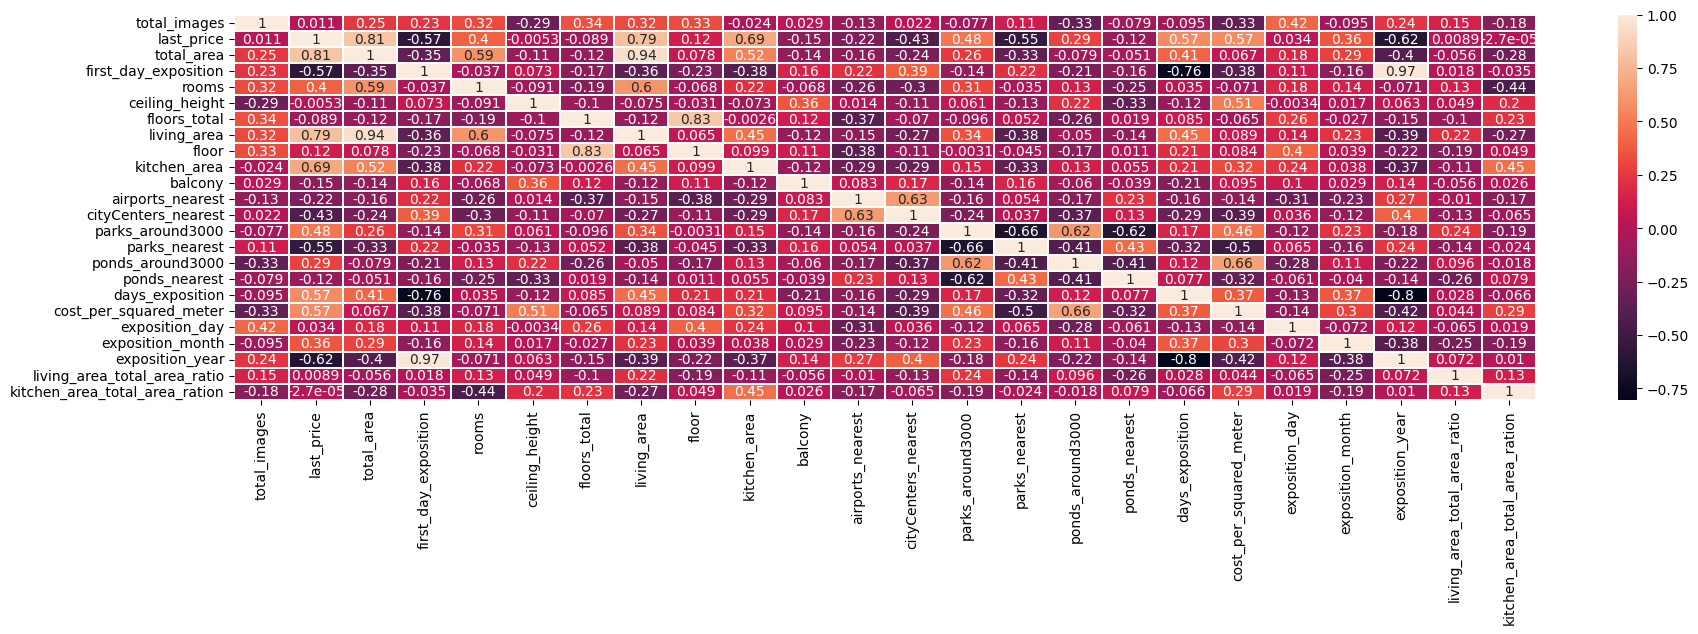

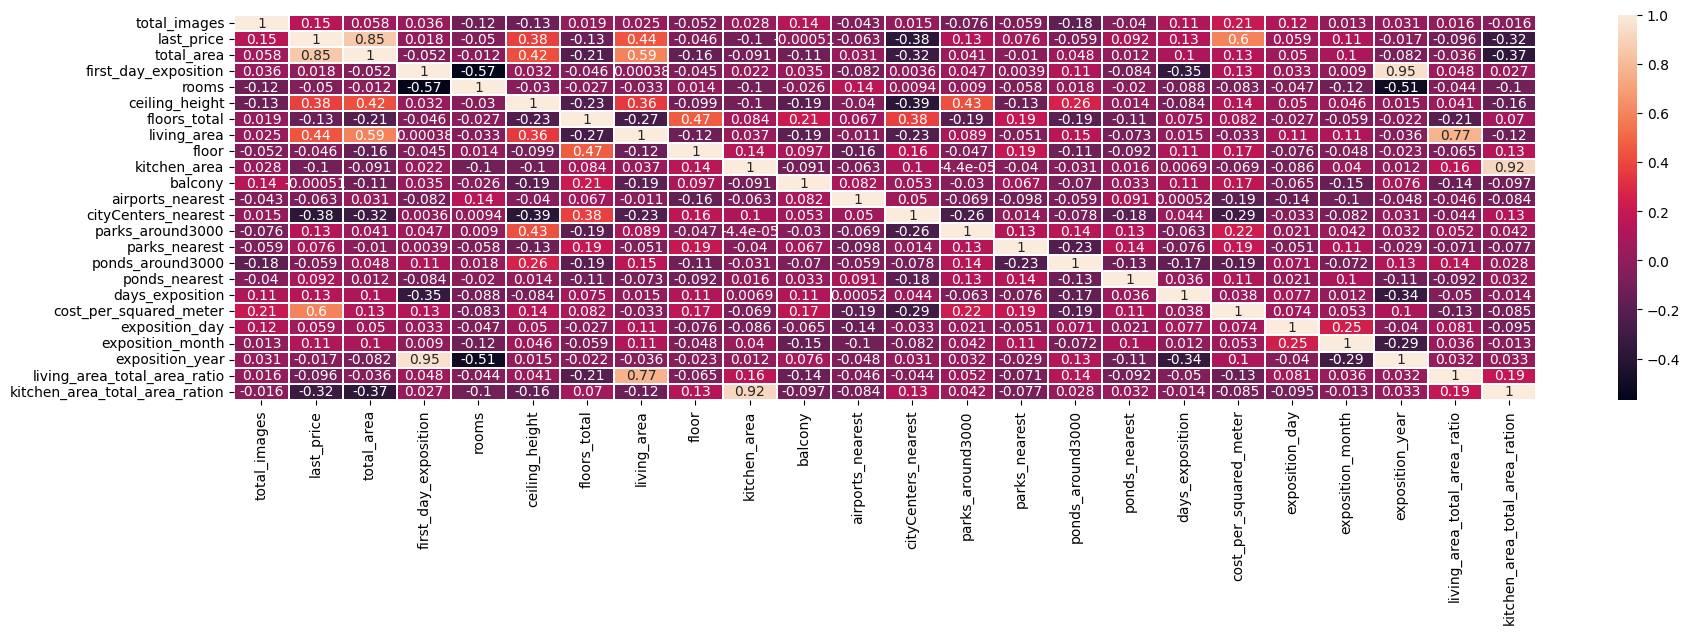

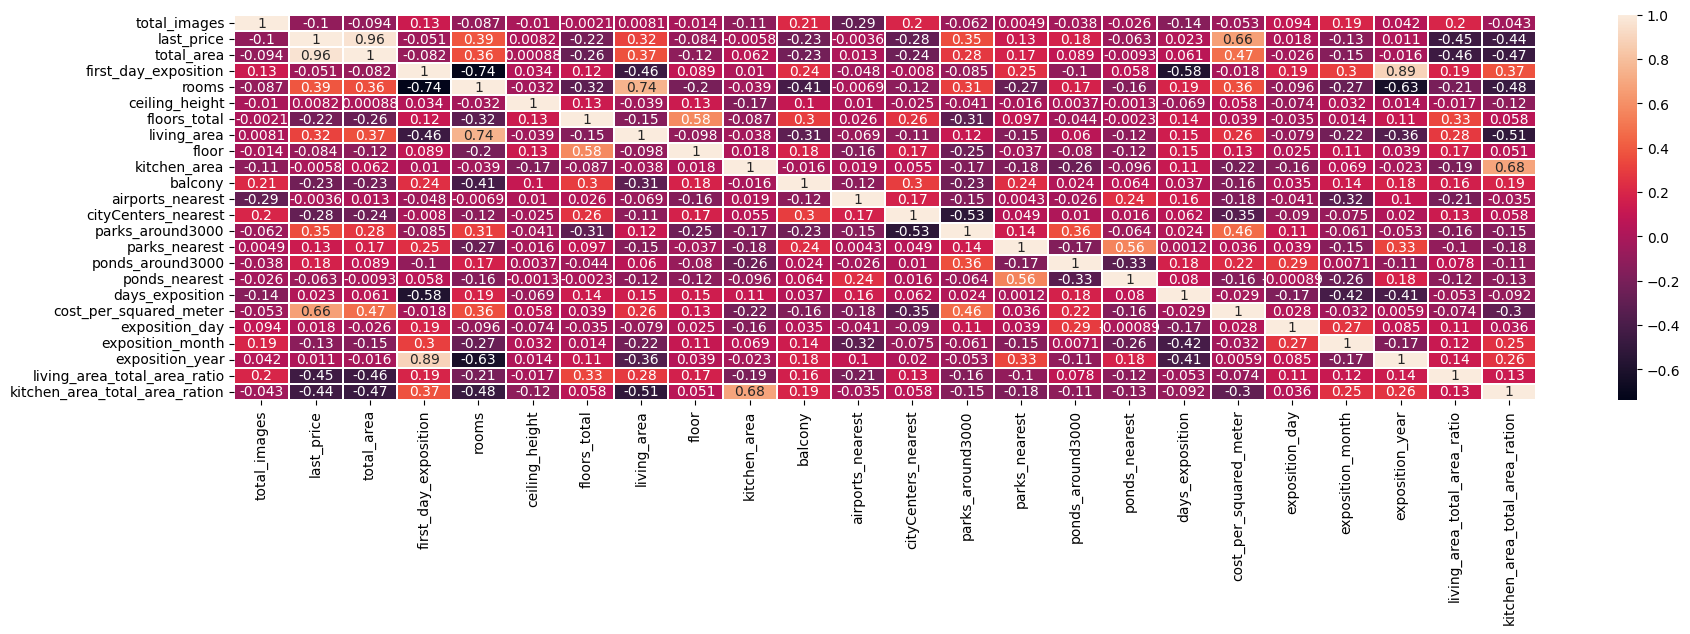

In [ ]:
for apartment in [apartments, studios, open_plans]:
    corr_matrix(get_numeric_data_types(apartment), figsize=(21, 5))

Для квартир открытого плана: понятно, что общая площадь будет очень и очень сильно коррелировать с ценой.
Тоже самое для студий: 0.85 корреляция с общей площадью. Причем в студиях заметно больше корреляцию имеет высота потолка 

В апартаментах мы видим, что параметры связанные с площадью имеют силиьную связь с ценой, причем чем больше дата публикации, тем меньше цена (сильная корреляция); можно сказать, что основные характеристики апартаментов (площадь, кол-во комнат и так далее) имееют сильную положительную связь - чем они больше, тем больше цена

Сравнивая студию с квартирами открытого плана: в целом, ценовые характеристики не очень сильно различаются, однако площадь квартир открытого плана в среднем больше, но медианные примерно на одном и том же уровне

**Общий вывод**

Из данного анализа можно сделать следующий вывод: цена на квартиру зависит от множества факторов: ее удаленность от центра, населенный пункт, тип квартиры тоже играет важную роль - взаимосвязи имеют разную степень выраженности, смотря какой тип квартиры - апартаменты, открытый план, студия; большое количество квартир имело "неадекватную" цену; цена за квадратный метр зависит от местонахождения квартиры, кол-ва комнат. В общем и целом, ценовые характеристики имеют нелинейную природу